LOADING DATASETS

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("MLR_Sales_Data.csv") 

In [3]:
data.head()

,Jacket,Zipper,Sweater,Sales
0,55.6,66.8,57.9,100.4
1,50.9,58.3,60.1,102.6
2,52.7,65.5,62.7,114.8
3,45.3,52.1,46.8,90.2
4,46.1,55.2,43.7,97.8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
Jacket     50 non-null float64
Zipper     50 non-null float64
Sweater    50 non-null float64
Sales      50 non-null float64
dtypes: float64(4)
memory usage: 1.6 KB


In [5]:
data.describe()

,Jacket,Zipper,Sweater,Sales
count,50.000000,50.000000,50.000000,50.00000
mean,40.730000,41.960000,40.292000,91.34400
std,15.900626,16.025846,15.025907,16.94823
min,10.800000,9.200000,11.300000,56.70000
25%,29.625000,32.150000,30.200000,82.35000
50%,39.700000,42.650000,37.700000,90.75000
75%,54.575000,52.625000,53.025000,104.62500
max,74.200000,73.400000,73.200000,124.40000


In [6]:
data.shape

(50, 4)

PLOTTING DATA

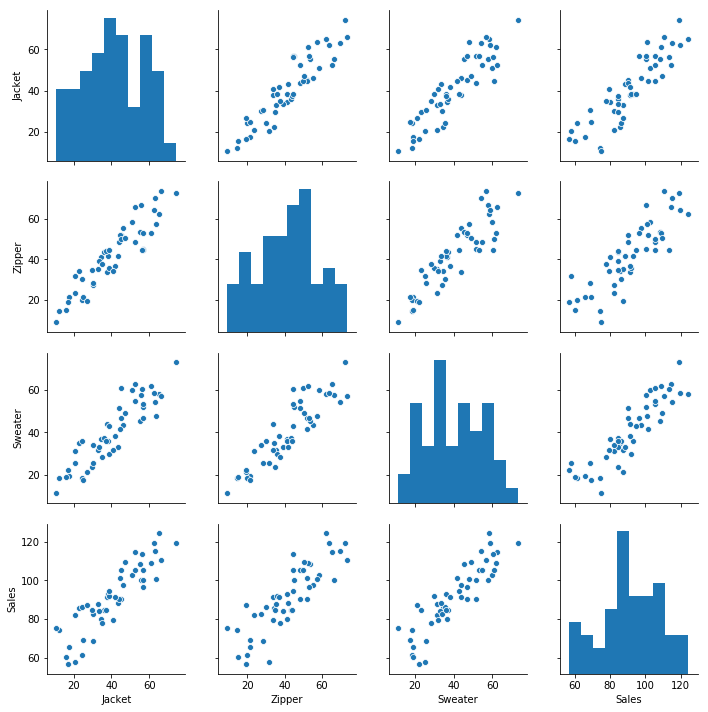

In [8]:
import seaborn as sns
sns.pairplot(data)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


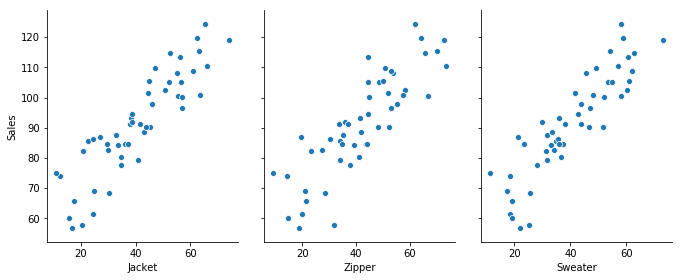

In [9]:
v = sns.pairplot(data, x_vars=["Jacket", "Zipper", "Sweater"], y_vars="Sales", size=4, aspect=0.8, kind="scatter" )

DIVIDING DATA IN x and y (Co-efficient and Intercept)

In [10]:
x = data[["Jacket","Zipper","Sweater"]]
y = data["Sales"]

In [11]:
x.head()

,Jacket,Zipper,Sweater
0,55.6,66.8,57.9
1,50.9,58.3,60.1
2,52.7,65.5,62.7
3,45.3,52.1,46.8
4,46.1,55.2,43.7


In [12]:
y.head()

0    100.4
1    102.6
2    114.8
3     90.2
4     97.8
Name: Sales, dtype: float64

MAKING TRAIN AND TEST SETS

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=150)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 3)
(15, 3)
(35,)
(15,)


CREATING AND FITTING VALUES IN LINEAR MODEL

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print(lr.intercept_)
print(lr.coef_)

50.00231111288772
[ 0.60719684 -0.12230938  0.5197448 ]


In [32]:
y_pred = lr.predict(x_test)

VISUALISING RESULTS (ERRORS AND ACCURACY)

Text(0,0.5,'Sales')

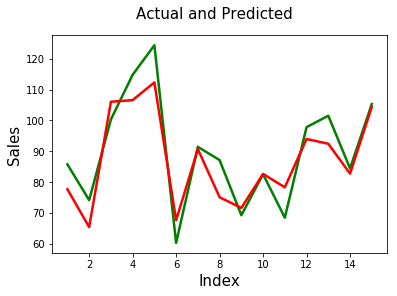

In [33]:
import matplotlib.pyplot as plt
c = [i for i in range(1,16,1)]
fig = plt.figure()
plt.plot(c,y_test, color="green", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle("Actual and Predicted", fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("Sales", fontsize=15)

Text(0,0.5,'y_test - y_pred')

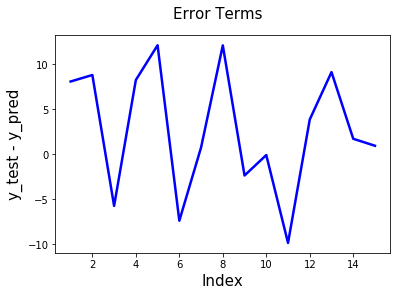

In [34]:
l = [i for i in range(1,16,1)]
fig = plt.figure()
plt.plot(l,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle("Error Terms", fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("y_test - y_pred", fontsize=15)

In [35]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Error:",mae)
print("Accuracy:",score*100)

Error: 6.065412992527204
Accuracy: 82.32037558941536


Text(0,0.5,'Predicted_y')

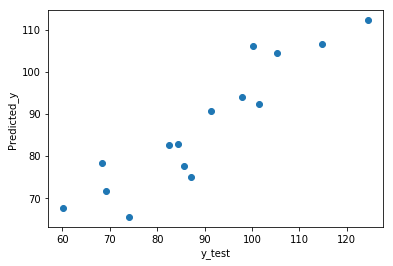

In [36]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("Predicted_y")